In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
df=pd.read_csv('failure.csv')

In [4]:
df.duplicated().sum() # no duplicate data

0

In [5]:
df.isnull().sum() # no empty data

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [7]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [8]:
df['date']=pd.to_datetime(df['date']) # Since it is a date object, we converted the type to datetime64[ns]
df['date']

0        2015-01-01
1        2015-01-01
2        2015-01-01
3        2015-01-01
4        2015-01-01
            ...    
124489   2015-11-02
124490   2015-11-02
124491   2015-11-02
124492   2015-11-02
124493   2015-11-02
Name: date, Length: 124494, dtype: datetime64[ns]

In [9]:
df['day']=df['date'].dt.day
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year

In [10]:
df

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,day,month,year
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,1,1,2015
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,1,1,2015
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,1,1,2015
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,1,1,2015
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,1,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0,2,11,2015
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13,2,11,2015
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0,2,11,2015
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0,2,11,2015


0    124388
1       106
Name: failure, dtype: int64


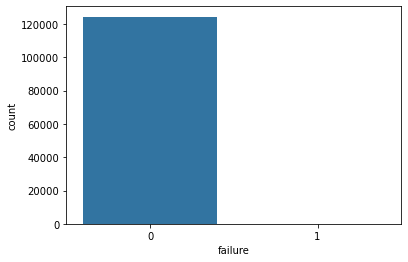

In [11]:
print(df.failure.value_counts())
sns.countplot(df["failure"]);
# Indicates an unbalanced data set

In [12]:
df.nunique()

date             304
device          1168
failure            2
attribute1    123878
attribute2       558
attribute3        47
attribute4       115
attribute5        60
attribute6     44838
attribute7        28
attribute8        28
attribute9        65
day               31
month             11
year               1
dtype: int64

In [13]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,day,month,year
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.0
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524,14.894196,4.028299,2015.0
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623,8.759542,2.572167,0.0
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2015.0
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000,7.000000,2.000000,2015.0
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000,15.000000,3.000000,2015.0
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000,22.000000,6.000000,2015.0
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000,31.000000,11.000000,2015.0


In [14]:
df.corr()['failure'].sort_values(ascending=False)
# since attribute 8 and 7 are the same let's discard one

failure       1.000000
attribute7    0.119055
attribute8    0.119055
attribute4    0.067398
attribute2    0.052902
day           0.002994
attribute5    0.002270
attribute1    0.001984
attribute9    0.001622
month         0.000321
attribute6   -0.000550
attribute3   -0.000948
year               NaN
Name: failure, dtype: float64

In [15]:
del df['attribute8']

In [16]:
df=df.drop('date',axis=1)

In [17]:
df[['attribute3','attribute4','attribute7','attribute9']]=df[['attribute3','attribute4','attribute7','attribute9']].astype('object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   device      124494 non-null  object
 1   failure     124494 non-null  int64 
 2   attribute1  124494 non-null  int64 
 3   attribute2  124494 non-null  int64 
 4   attribute3  124494 non-null  object
 5   attribute4  124494 non-null  object
 6   attribute5  124494 non-null  int64 
 7   attribute6  124494 non-null  int64 
 8   attribute7  124494 non-null  object
 9   attribute9  124494 non-null  object
 10  day         124494 non-null  int64 
 11  month       124494 non-null  int64 
 12  year        124494 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 12.3+ MB


In [19]:
df['device']=[i[:4] for i in df.device.values.tolist()]

In [20]:
df

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,day,month,year
0,S1F0,0,215630672,56,0,52,6,407438,0,7,1,1,2015
1,S1F0,0,61370680,0,3,0,6,403174,0,0,1,1,2015
2,S1F0,0,173295968,0,0,0,12,237394,0,0,1,1,2015
3,S1F0,0,79694024,0,0,0,6,410186,0,0,1,1,2015
4,S1F0,0,135970480,0,0,0,15,313173,0,3,1,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,Z1F0,0,18310224,0,0,0,10,353705,8,0,2,11,2015
124490,Z1F0,0,172556680,96,107,4,11,332792,0,13,2,11,2015
124491,Z1F0,0,19029120,4832,0,0,11,350410,0,0,2,11,2015
124492,Z1F0,0,226953408,0,0,0,12,358980,0,0,2,11,2015


In [21]:
df.device.value_counts()

S1F0    33169
W1F0    23294
S1F1    21689
W1F1    19974
Z1F0    18869
Z1F1     7248
Z1F2      251
Name: device, dtype: int64

In [22]:
outliers=df.quantile(.95)
df=df[(df['attribute1']<outliers['attribute1'])]
df=df[(df['attribute2']<outliers['attribute2'])]
df=df[(df['attribute6']<outliers['attribute6'])]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106351 entries, 1 to 124493
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   device      106351 non-null  object
 1   failure     106351 non-null  int64 
 2   attribute1  106351 non-null  int64 
 3   attribute2  106351 non-null  int64 
 4   attribute3  106351 non-null  object
 5   attribute4  106351 non-null  object
 6   attribute5  106351 non-null  int64 
 7   attribute6  106351 non-null  int64 
 8   attribute7  106351 non-null  object
 9   attribute9  106351 non-null  object
 10  day         106351 non-null  int64 
 11  month       106351 non-null  int64 
 12  year        106351 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 11.4+ MB


In [24]:
x=df.drop('failure',axis=1)
y=df['failure']

In [25]:
x=pd.get_dummies(x,drop_first=True)

In [26]:
#! pip install imblearn

In [27]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

In [29]:
gbc=GradientBoostingClassifier()

In [30]:
rus=RandomUnderSampler(random_state=42)
x_rus,y_rus=rus.fit_resample(x_train,y_train)
pred=gbc.fit(x_rus,y_rus).predict(x_test)

In [31]:
confusion_matrix(y_test,pred)

array([[15616, 10955],
       [    4,    13]], dtype=int64)

In [32]:
def classifier (x,y):
    g=GaussianNB()
    b=BernoulliNB()
    dtc=DecisionTreeClassifier()
    knn=KNeighborsClassifier()
    lr=LogisticRegression()
    rfc=RandomForestClassifier()
    gbc=GradientBoostingClassifier()
    abc=AdaBoostClassifier()
    xgbc=XGBClassifier()
    svc=SVC()
    
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)
    algorithms = [g,b,dtc,knn,lr,rfc,gbc,abc,xgbc,svc]
    algo_names = ['GaussianNB', 'BernoulliNB', 'K Nearest', 'Logistic', 'Decisio Tree', 'Random Forest', 'Gradient Boost', 'Ada Boost','SVC','XGBC']
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    
    result=pd.DataFrame(columns=['AccuracyScore','PresicionScore','RecallScore','F1_score'], index=algo_names)
    
    for i in algorithms :
        
        rus=RandomUnderSampler(random_state=42)
        
        x_rus,y_rus=rus.fit_resample(x_train,y_train)
        
        pred=i.fit(x_rus,y_rus).predict(x_test)
        
        accuracy.append(accuracy_score(y_test, pred))
        precision.append(accuracy_score(y_test, pred))
        recall.append(accuracy_score(y_test, pred))
        f1.append(accuracy_score(y_test, pred))
        
    result.AccuracyScore=accuracy
    result.PresicionScore=precision
    result.RecallScore=recall
    result.F1_Score=f1
    
    return result.sort_values('AccuracyScore', ascending=False)
    

In [33]:
classifier(x,y)

[16:10:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,AccuracyScore,PresicionScore,RecallScore,F1_score
BernoulliNB,0.950053,0.950053,0.950053,NaN
Random Forest,0.724613,0.724613,0.724613,NaN
Ada Boost,0.667369,0.667369,0.667369,NaN
K Nearest,0.662931,0.662931,0.662931,NaN
Gradient Boost,0.585791,0.585791,0.585791,NaN
SVC,0.537912,0.537912,0.537912,NaN
Decisio Tree,0.501956,0.501956,0.501956,NaN
Logistic,0.496916,0.496916,0.496916,NaN
XGBC,0.446216,0.446216,0.446216,NaN
GaussianNB,0.392884,0.392884,0.392884,NaN


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation,Dense

In [37]:
model=Sequential()
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_rus,y_rus,validation_data=(x_test,y_test),batch_size=128,epochs=40,verbose=1)

Epoch 1/40
1/1 [==============================] - 1s 621ms/step - loss: 2168588.5000 - accuracy: 0.5000 - val_loss: 2432215.7500 - val_accuracy: 6.3939e-04
Epoch 2/40
1/1 [==============================] - 0s 211ms/step - loss: 1159635.1250 - accuracy: 0.5000 - val_loss: 776798.7500 - val_accuracy: 7.8983e-04
Epoch 3/40
1/1 [==============================] - 0s 210ms/step - loss: 370354.5000 - accuracy: 0.5000 - val_loss: 1014.0673 - val_accuracy: 0.9991
Epoch 4/40
1/1 [==============================] - 0s 208ms/step - loss: 872368.3125 - accuracy: 0.5000 - val_loss: 833.8116 - val_accuracy: 0.9992
Epoch 5/40
1/1 [==============================] - 0s 212ms/step - loss: 717429.0000 - accuracy: 0.5000 - val_loss: 73.4069 - val_accuracy: 0.9991
Epoch 6/40
1/1 [==============================] - 0s 210ms/step - loss: 63085.0547 - accuracy: 0.5000 - val_loss: 1382659.2500 - val_accuracy: 0.0011
Epoch 7/40
1/1 [==============================] - 0s 216ms/step - loss: 659227.6250 - accuracy: 0.

In [39]:
_,accuracy=model.evaluate(x_test,y_test)
print('Accuracy:%2f'%(accuracy*100))

831/831 [==============================] - 1s 881us/step - loss: 137494.6406 - accuracy: 0.0023
Accuracy:0.225666
